---
title: "4A. Reporte escrito. Experimentos y análisis de algoritmos de búsqueda por comparación."
subtitle: "Análisis de Algoritmos 2025-2"
author: "Mendiola Alavéz Dalia Isabel"
format:
  pdf:
    documentclass: article
    fontsize: 11pt
    geometry: margin=1in
    code-overflow: wrap
    output-width: 0.9\textwidth
    include-in-header:
      text: |
        \usepackage{fancyhdr}
        \pagestyle{fancy}
        \fancyhead[L]{Mendiola Alavéz Dalia Isabel}
        \fancyhead[R]{Análisis de Algoritmos 2025-2}
        \fancyfoot[C]{\thepage}
        \usepackage[htt]{hyphenat}
---

**Introducción**

La búsqueda de información dentro de estructuras de datos ordenadas constituye una operación fundamental en el diseño y análisis de algoritmos. En numerosos contextos (como bases de datos, sistemas de recuperación de información, compiladores o motores de búsqueda) la eficiencia con que se localiza un elemento específico determina directamente el rendimiento global del sistema (Cormen et al., 2022). Los algoritmos de búsqueda por comparación representan una de las estrategias más estudiadas y aplicadas, ya que permiten evaluar la eficiencia de diferentes métodos en función del número de comparaciones realizadas y del tiempo requerido para localizar un elemento dentro de un conjunto de datos.

El principio general de estos algoritmos consiste en comparar iterativamente un elemento objetivo con los contenidos de una lista o estructura ordenada hasta encontrar una coincidencia o determinar su posición. La diferencia esencial entre los métodos radica en la forma de exploración del espacio de búsqueda. Por ejemplo, la búsqueda secuencial $(B_0)$ recorre los elementos uno a uno, con una complejidad promedio de orden $O(n)$, adecuada únicamente para listas pequeñas o sin orden específico (Knuth, 1998). Las variantes no acotadas como $B_1$ y $B_2$ emplean saltos o expansiones exponenciales para delimitar intervalos, mejorando el rendimiento en algunos escenarios (Bentley & Yao, 1976).

Por otro lado, la búsqueda binaria utiliza la estructura ordenada de los datos, dividiendo el conjunto en mitades sucesivas y logrando una complejidad de $O(\log{n})$, que la convierte en una de las técnicas más eficientes para listas estáticas (Cormen et al., 2022). En contraste, estructuras más modernas como la Skip List introducen un enfoque probabilístico que permite mantener tiempos promedio de búsqueda, inserción y eliminación también en $O(\log{n})$, con una implementación más simple (Pugh, 1990).

El objetivo de esta práctica es analizar y comparar experimentalmente distintos algoritmos de búsqueda por comparación, evaluando su comportamiento en términos del número total de comparaciones y del tiempo promedio de ejecución al aplicarse sobre listas de diferente tamaño y nivel de perturbación. A través de esta evaluación, se busca contrastar el comportamiento experimental con la complejidad teórica esperada y comprender las condiciones bajo las cuales cada algoritmo resulta más eficiente. Este análisis permite reforzar la comprensión de los principios de diseño algorítmico y de la relación entre costo computacional y estructura de datos.

Para comenzar, se importan las librerías a utilizar:

In [28]:
# Para cargar y manipular datos en formato JSON:
import json
# Para medir el tiempo de ejecución de cada algoritmo:
import time
# Para operaciones aleatorias:
import random
# Para generar gráficas y visualizar resultados:
import matplotlib.pyplot as plt
# Para manipular los resultados en tablas y analizarlos fácilmente:
import pandas as pd
# Para proporcionar un valor por defecto para claves que no existen:
from collections import defaultdict
# Para  acceder a funciones numéricas:
import numpy as np

Se realiza la lectura de los archivos a evaluar desde Drive:

In [29]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/algoritmos_ordenamiento/"

listas_posteo = [
    "listas-posteo-con-perturbaciones-p=016.json",
    "listas-posteo-con-perturbaciones-p=032.json",
    "listas-posteo-con-perturbaciones-p=064.json",
    "listas-posteo-con-perturbaciones-p=128.json",
    "listas-posteo-con-perturbaciones-p=256.json",
    "listas-posteo-con-perturbaciones-p=512.json",
]
consultas = [
    "consultas-1-listas-posteo.json",
    "consultas-2-listas-posteo.json",
    "consultas-3-listas-posteo.json",
    "consultas-4-listas-posteo.json",
]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Establecemos un contador de comparaciones:

In [30]:
# Esta clase permite evaluar la eficiencia de cada algoritmo
# en términos de operaciones de comparación.
class Comparador:
    def __init__(self):
        self.count = 0

    # Función que realiza una comparación entre 'a' y 'b' utilizando el operador
    # indicado. Incrementa el contador cada vez que se ejecuta una comparación.
    def compare(self, a, b, op):
        self.count += 1
        if op == "<":
            return a < b
        elif op == "<=":
            return a <= b
        elif op == "==":
            return a == b
        elif op == ">":
            return a > b
        elif op == ">=":
            return a >= b
        else:
            raise ValueError("Operador no permitido")

A continuación, se establecen las funciones para la implementación de los algoritmos de búsqueda:

1. Búsqueda secuencial $(B_0)$

In [31]:
def busqueda_secuencial(lista, x, comp: Comparador):
    """
    Realiza una búsqueda secuencial (lineal) en una lista ordenada.

    Parámetros:
    lista : Lista ordenada de elementos donde se realizará la búsqueda.
    x : Elemento que se desea encontrar.
    comp : Objeto de tipo Comparador que define el método compare(a, b, operador)
        para realizar las comparaciones.

    Retorna:
    True si el elemento se encuentra en la lista, False en caso contrario.
    """

    for v in lista:
        if comp.compare(v, x, "=="):
            return True
        elif comp.compare(v, x, ">"):
            break

    return False


2. Búsqueda binaria acotada

In [32]:
def busqueda_binaria(lista, x, comp: Comparador):
    """
    Realiza una búsqueda binaria en una lista ordenada.Este algoritmo divide
    repetidamente la lista en mitades para reducir el espacio de búsqueda. En
    cada iteración, compara el elemento del medio con el valor buscado.

    Parámetros:
    lista : Lista ordenada de elementos donde se realizará la búsqueda.
    x : Elemento que se desea encontrar.
    comp : Objeto de tipo Comparador que define el método compare(a, b, operador)
        para realizar las comparaciones.

    Retorna:
    True si el elemento se encuentra en la lista, False en caso contrario.
    """

    # Se definen los límites iniciales del rango de búsqueda:
    izq, der = 0, len(lista) - 1

    # Repetimos mientras haya un rango válido:
    while izq <= der:
        mid = (izq + der) // 2

        # Comparar el elemento medio con el valor buscado:
        if comp.compare(lista[mid], x, "=="):
            return True

        # Si el valor medio es menor que 'x', se descarta la mitad izquierda:
        elif comp.compare(lista[mid], x, "<"):
            izq = mid + 1

        # Si el valor medio es mayor, se descarta la mitad derecha:
        else:
            der = mid - 1

    return False

3. Búsquedas no acotadas ($B_1$ y $B_2$)

In [33]:
def busqueda_no_acotada_B1(lista, elemento, counter):
    """
    Realiza una búsqueda no acotada B1. Se utiliza cuando no se conoce el tamaño
    efectivo de la lista o cuando se desea reducir el rango de búsqueda
    antes de aplicar otro algoritmo.

    Proceso:
    1. Se comienza con un salto inicial de tamaño 1.
    2. Mientras el elemento actual sea menor que el buscado,
       el salto se duplica, avanzando en la lista.
    3. Cuando se encuentra un elemento mayor o igual al buscado,
       se define un intervalo [i/2, i] como posible rango de búsqueda.
    4. Se realiza una búsqueda secuencial dentro de ese rango.

    Parámetros:
    lista : Lista ordenada en la que se realiza la búsqueda.
    elemento : Elemento que se desea encontrar.
    counter : Objeto con el método compare usado para contar comparaciones.

    Retorna:
    True si el elemento se encuentra en la lista, False en caso contrario.
    """

    n = len(lista)
    salto = 1
    i = 0

    # Fase exponencial:
    while i < n and counter.compare(lista[i], elemento, "<"):
        i += salto
        salto *= 2

    # Determinar el rango acotado para búsqueda secuencial:
    inicio = max(0, i // 2)
    fin = min(i, n)

    # Búsqueda secuencial en el rango encontrado:
    for j in range(inicio, fin):
        if counter.compare(lista[j], elemento, "=="):
            return True

    return False

def busqueda_no_acotada_B2(lista, elemento, counter):
    """
    Realiza una búsqueda no acotada tipo B2 (búsqueda exponencial con búsqueda
    binaria final). Es útil en listas grandes donde el tamaño no es conocido o
    se accede de manera progresiva.

    Proceso:
    1. Se comienza verificando el primer elemento de la lista.
    2. Si el elemento buscado no está ahí, se aumenta el índice de manera
       exponencial hasta sobrepasar o igualar al elemento buscado.
    3. Una vez delimitado el intervalo [i/2, i], se aplica búsqueda binaria.
    4. Si el elemento se encuentra, se devuelve True; en caso contrario, False.

    Parámetros:
    lista : Lista ordenada en la que se realiza la búsqueda.
    elemento : Elemento que se desea encontrar.
    counter : Objeto con el método compare usado para contabilizar comparaciones.

    Retorna: True si el elemento se encuentra en la lista, False en caso contrario.
    """

    n = len(lista)
    if n == 0:
        return False

    if counter.compare(lista[0], elemento, "=="):
        return True

    # Fase exponencial:
    i = 1
    while i < n and counter.compare(lista[i], elemento, "<"):
        i *= 2

    # Se definen los límites del rango acotado:
    izquierda = i // 2
    derecha = min(i, n)

    # Fase de búsqueda binaria en el rango [izquierda, derecha):
    while izquierda < derecha:
        medio = (izquierda + derecha) // 2

        if counter.compare(lista[medio], elemento, "=="):
            return True
        elif counter.compare(lista[medio], elemento, "<"):
            izquierda = medio + 1
        else:
            derecha = medio

    return False

4. Skiplist para búsqueda

In [34]:
class Node:
    """
    Clase que representa un nodo dentro de la SkipList. Cada nodo almacena una
    clave y una lista de punteros que apuntan a otros nodos en distintos niveles.

    Atributos:
    key : Valor o clave almacenada en el nodo.
    forward : Lista de referencias a los siguientes nodos en cada nivel.
    """

    def __init__(self, key, level):
        self.key = key
        self.forward = [None] * (level + 1)


class SkipList:
    """
    Implementación de una SkipList. Es una lista ordenada que permite operaciones
    de búsqueda, inserción y eliminación gracias a su estructura multinivel
    basada en probabilidades.

    Parámetros:
    max_level : Número máximo de niveles que puede tener la lista.
    p : Probabilidad usada para determinar cuántos niveles tendrá
        cada nuevo nodo.

    Atributos:
    header : Nodo cabecera (sin clave) que sirve como punto de partida.
    level : Nivel actual más alto de la lista (crece dinámicamente).
    """

    def __init__(self, max_level=12, p=0.25):
        self.max_level = max_level
        self.p = p
        self.header = Node(None, self.max_level)
        self.level = 0

    def random_level(self):
        """
        Genera aleatoriamente un nivel para un nuevo nodo, de acuerdo con la
        probabilidad `p`. Este método determina cuántos niveles tendrá un nodo
        recién insertado.

        Retorna:
        lvl : Nivel aleatorio generado para el nuevo nodo.
        """
        lvl = 0
        while random.random() < self.p and lvl < self.max_level:
            lvl += 1
        return lvl

    def insert(self, key):
        """
        Inserta una nueva clave en la SkipList manteniendo el orden.
        """

        update = [None] * (self.max_level + 1)
        current = self.header

        # 1: Busca la posición de inserción en cada nivel:
        for i in reversed(range(self.level + 1)):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
            update[i] = current

        # 2: Se posiciona en el siguiente nodo (nivel 0):
        current = current.forward[0]

        # 3: Inserta si la clave no está duplicada:
        if current is None or current.key != key:
            lvl = self.random_level()

            # Si el nuevo nivel excede el nivel actual, se actualiza la lista:
            if lvl > self.level:
                for i in range(self.level + 1, lvl + 1):
                    update[i] = self.header
                self.level = lvl

            # 4: Crea el nuevo nodo e inserta referencias:
            new_node = Node(key, lvl)
            for i in range(lvl + 1):
                new_node.forward[i] = update[i].forward[i]
                update[i].forward[i] = new_node

    def search(self, key, counter):
        """
        Busca una clave en la SkipList utilizando múltiples niveles.

        Proceso:
        1. Inicia desde el nodo cabecera en el nivel más alto.
        2. Avanza hacia adelante mientras la clave actual sea menor que la buscada.
        3. Cuando no puede avanzar más en ese nivel, desciende un nivel.
        4. Finalmente, verifica si la clave del nodo encontrado coincide.

        Parámetros:
        key : Clave que se desea buscar.
        counter : Objeto contador que registra el número de comparaciones.

        Retorna:
        True si la clave se encuentra, False en caso contrario.
        """

        current = self.header
        # Fase de navegación descendente:
        for i in reversed(range(self.level + 1)):
            while current.forward[i] and counter.compare(current.forward[i].key,
                                                         key, "<"):
                current = current.forward[i]

        # Verificación final en el nivel más bajo:
        current = current.forward[0]
        if current and counter.compare(current.key, key, "=="):
            return True
        return False

Se establece la función para ejecutar los métodos y mostrar los resultados:

In [36]:
def evaluar_busquedas(listas_posteo, consultas, path="."):
    """
    Evalúa el rendimiento de distintos algoritmos de búsqueda sobre múltiples
    listas de posteo y diferentes conjuntos de consultas. Calcula el número de
    comparaciones y el tiempo de ejecución para cada algoritmo, mostrando los
    resultados totales y promedios.

    Parámetros
    listas_posteo : Archivos JSON con las listas de posteo a evaluar.
    consultas : Archivos JSON con las listas de consultas a buscar.
    path : Ruta del directorio donde se encuentran los archivos.

    Retorna
    df : Resultados de cada ejecución (por lista, consulta y algoritmo).
    resumen_global : Promedios y totales agrupados por tipo de consulta y algoritmo.
    """

    resultados = []

    # Función auxiliar para convertir valores a enteros:
    def try_int(x):
        try:
            return int(x)
        except Exception:
            return x

    # Se recorre cada lista de posteo:
    for lista_file in listas_posteo:
        nombre_lista = lista_file.replace("listas-posteo-con-perturbaciones-", "").replace(".json", "")

        with open(f"{path}/{lista_file}", "r") as f:
            data_lista = json.load(f)

        # Unificar sublistas dentro del archivo en una sola lista plana:
        todos_elementos = []
        for key in data_lista:
            for v in data_lista[key]:
                todos_elementos.append(try_int(v))

        # Se verifican tipos de datos y se ordenan:
        tipos = set(type(x) for x in todos_elementos if x is not None)
        if len(tipos) == 0:
            print(f"Advertencia: lista {nombre_lista} vacía.")
            todos_elementos_sorted = []
        elif len(tipos) == 1:
            todos_elementos_sorted = sorted(todos_elementos)
        else:
            todos_elementos_sorted = sorted([str(x) for x in todos_elementos])

        #print(f"{nombre_lista}: elementos totales = {len(todos_elementos_sorted)}")

        # Se crea una estructura SkipList para este conjunto de datos:
        skiplist = SkipList()
        for v in todos_elementos_sorted:
            skiplist.insert(v)

        # Se evalúa cada conjunto de consultas sobre la lista actual:
        for consultas_file in consultas:
            nombre_consulta = consultas_file.replace("-listas-posteo.json", "")

            with open(f"{path}/{consultas_file}", "r") as f:
                consultas_data = json.load(f)

            if len(todos_elementos_sorted) == 0:
                continue

            sample_type = type(todos_elementos_sorted[0])

            # Se normalizan las consultas para que sean del mismo tipo:
            consultas_norm = []
            for q in consultas_data:
                q_conv = try_int(q)
                if sample_type is int and isinstance(q_conv, int):
                    consultas_norm.append(q_conv)
                else:
                    consultas_norm.append(str(q))

            #print(f"  {nombre_consulta}: consultas = {len(consultas_norm)}, tipo = {sample_type.__name__}")

            # Se definen los algoritmos a evaluar:
            algoritmos = {
                "B_0": busqueda_secuencial,
                "Binaria": busqueda_binaria,
                "B_1": busqueda_no_acotada_B1,
                "B_2": busqueda_no_acotada_B2,
                "SkipList": None
            }

            # Evaluación de cada algoritmo
            for nombre, funcion in algoritmos.items():
                total_comps = 0
                inicio = time.time()

                for q in consultas_norm:
                    comp = Comparador()
                    if nombre == "SkipList":
                        skiplist.search(q, comp)
                    else:
                        funcion(todos_elementos_sorted, q, comp)
                    total_comps += comp.count

                tiempo_total = time.time() - inicio
                promedio = total_comps / len(consultas_norm) if consultas_norm else 0

                resultados.append({
                    "Query": nombre_consulta,
                    "List": nombre_lista,
                    "Algorithm": nombre,
                    "Tot_comparisons": total_comps,
                    "Avg_comparisons": round(promedio, 3),
                    "Tot_time(s)": round(tiempo_total, 6),
                    "Avg_time(s)": round(tiempo_total / len(consultas_norm) if consultas_norm else 0, 6)
                })

    # Crear DataFrames con resultados:
    df = pd.DataFrame(resultados)

    if df.empty:
        print("No se generaron resultados. Verificar archivos.")
        return None, None

    # Resumen global agrupado por consulta y algoritmo:
    resumen_global = (
        df.groupby(["Query", "Algorithm"])
          .agg({
              "Tot_comparisons": "sum",
              "Avg_comparisons": "mean",
              "Tot_time(s)": "sum",
              "Avg_time(s)": "mean"
          })
          .reset_index()
          .sort_values(["Query", "Algorithm"])
    )

    # Mostrar resultados:
    pd.set_option("display.max_rows", None)
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 120)
    pd.set_option("display.colheader_justify", "center")
    pd.set_option("display.precision", 6)

    print("\n RESULTADOS DETALLADOS:")
    display(df.sort_values(["Query", "List", "Algorithm"]).reset_index(drop=True))

    print("\n RESUMEN GLOBAL (Totales y Promedios por Consulta):")
    display(resumen_global)

    return df, resumen_global

Se ejecutan los métodos y se muestran los resultados obtenidos:

In [37]:
df_resultados, resumen_global = evaluar_busquedas(listas_posteo, consultas, path)


 RESULTADOS DETALLADOS:


,Query,List,Algorithm,Tot_comparisons,Avg_comparisons,Tot_time(s),Avg_time(s)
0,consultas-1,p=016,B_0,580568,58.057,0.157595,0.000016
1,consultas-1,p=016,B_1,155805,15.581,0.052207,0.000005
2,consultas-1,p=016,B_2,100333,10.033,0.032656,0.000003
3,consultas-1,p=016,Binaria,285372,28.537,0.091375,0.000009
4,consultas-1,p=016,SkipList,117771,11.777,0.039210,0.000004
5,consultas-1,p=032,B_0,580568,58.057,0.089281,0.000009
6,consultas-1,p=032,B_1,155805,15.581,0.028065,0.000003
7,consultas-1,p=032,B_2,100333,10.033,0.017650,0.000002
8,consultas-1,p=032,Binaria,285372,28.537,0.046618,0.000005
9,consultas-1,p=032,SkipList,117910,11.791,0.022507,0.000002



 RESUMEN GLOBAL (Totales y Promedios por Consulta):


,Query,Algorithm,Tot_comparisons,Avg_comparisons,Tot_time(s),Avg_time(s)
0,consultas-1,B_0,3483408,58.057000,0.540846,0.000009
1,consultas-1,B_1,934830,15.581000,0.195152,0.000003
2,consultas-1,B_2,601998,10.033000,0.124503,0.000002
3,consultas-1,Binaria,1712232,28.537000,0.328207,0.000006
4,consultas-1,SkipList,776836,12.947500,0.160431,0.000003
5,consultas-2,B_0,60364812,1006.080000,9.837101,0.000164
6,consultas-2,B_1,10551906,175.865000,1.991031,0.000033
7,consultas-2,B_2,1243968,20.733000,0.272196,0.000004
8,consultas-2,Binaria,1715460,28.591000,0.350361,0.000006
9,consultas-2,SkipList,1090917,18.182167,0.259358,0.000004


Se presentan las gráficas de resultados:

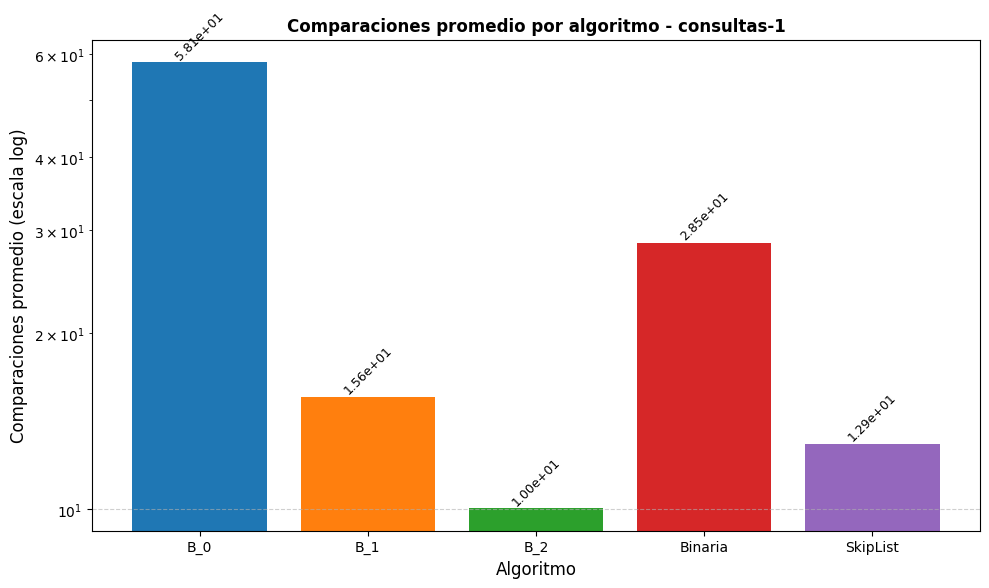

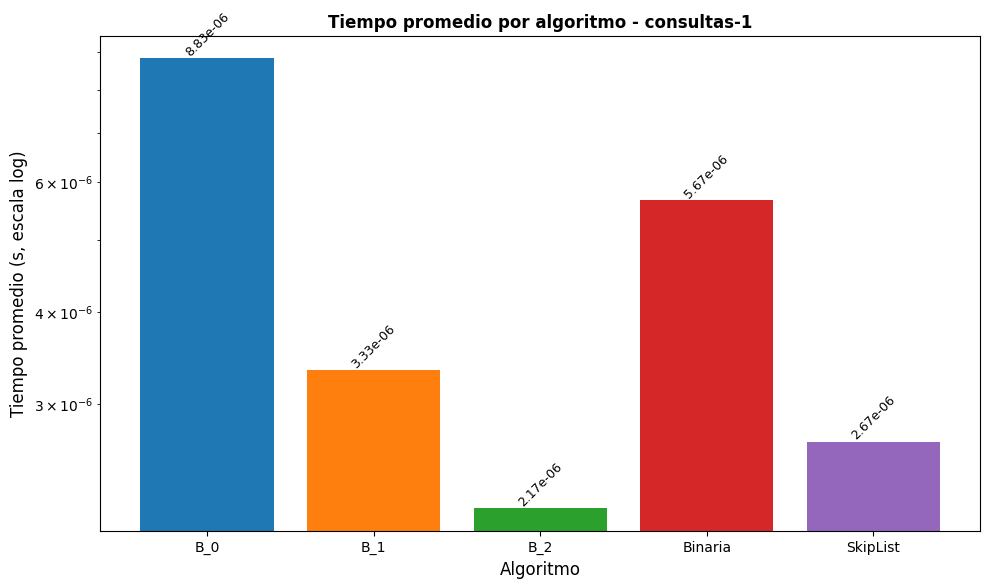

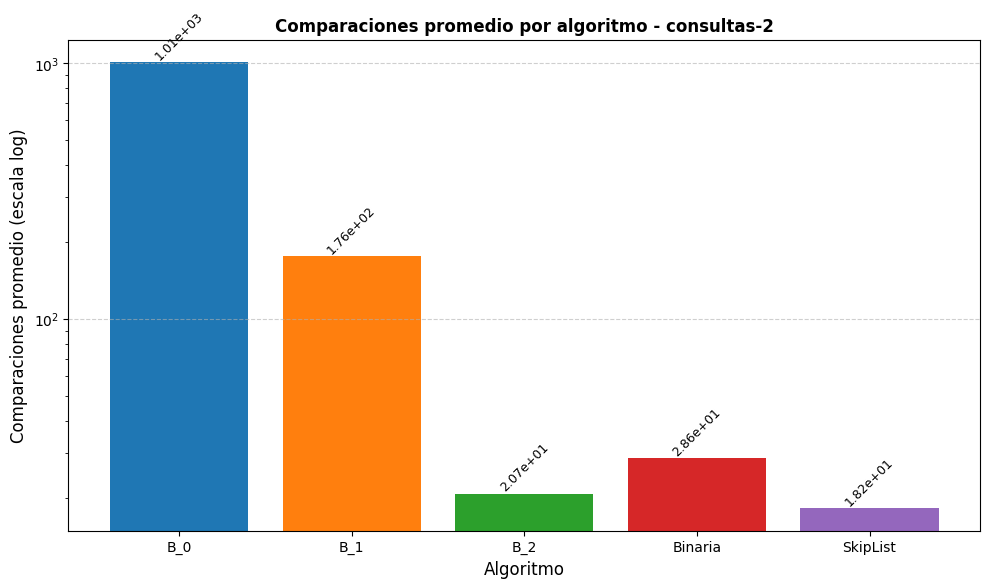

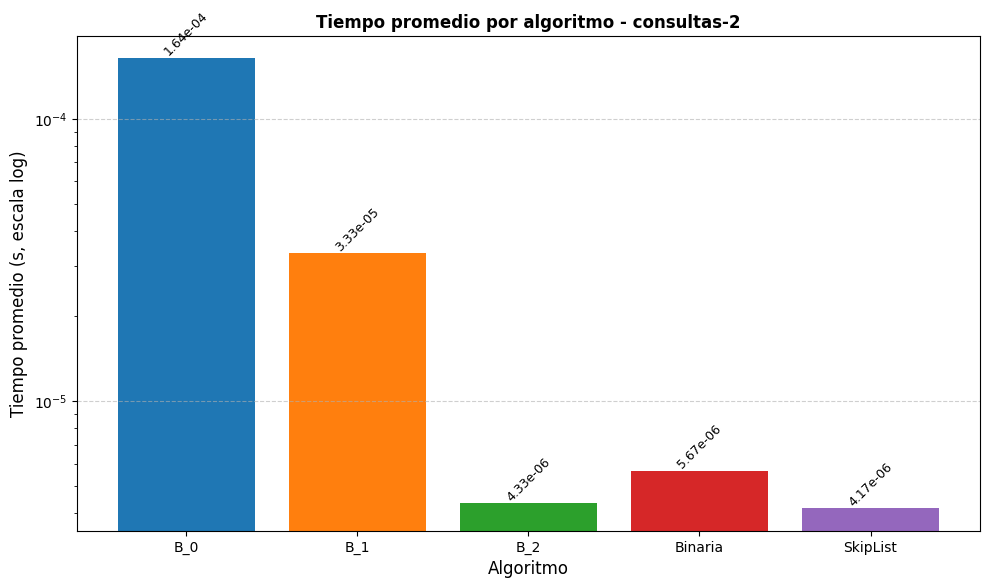

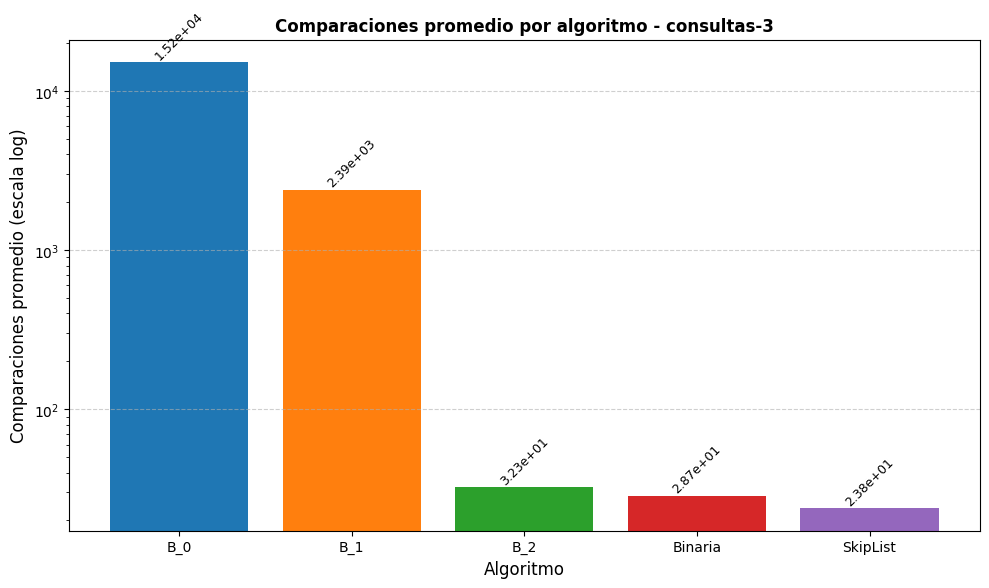

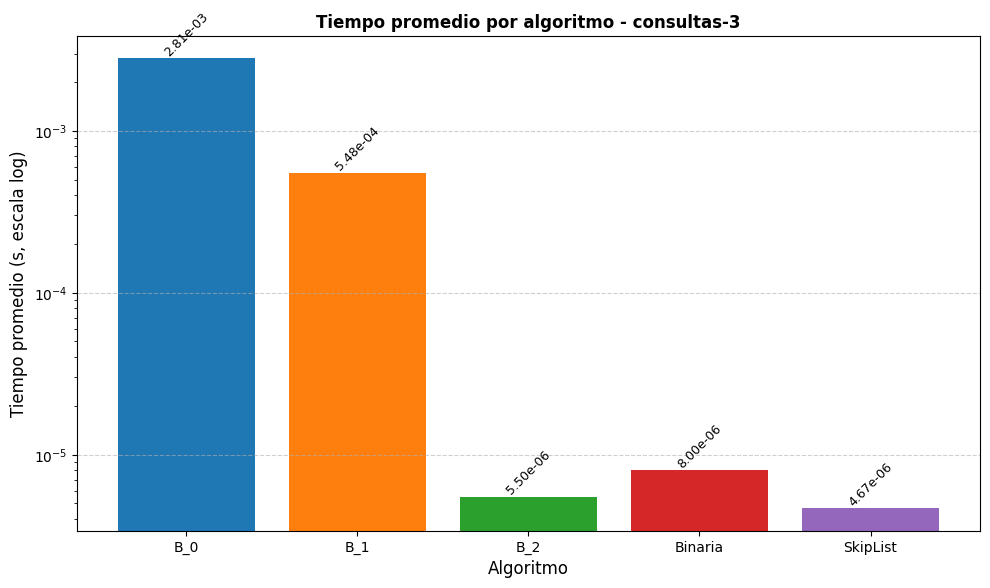

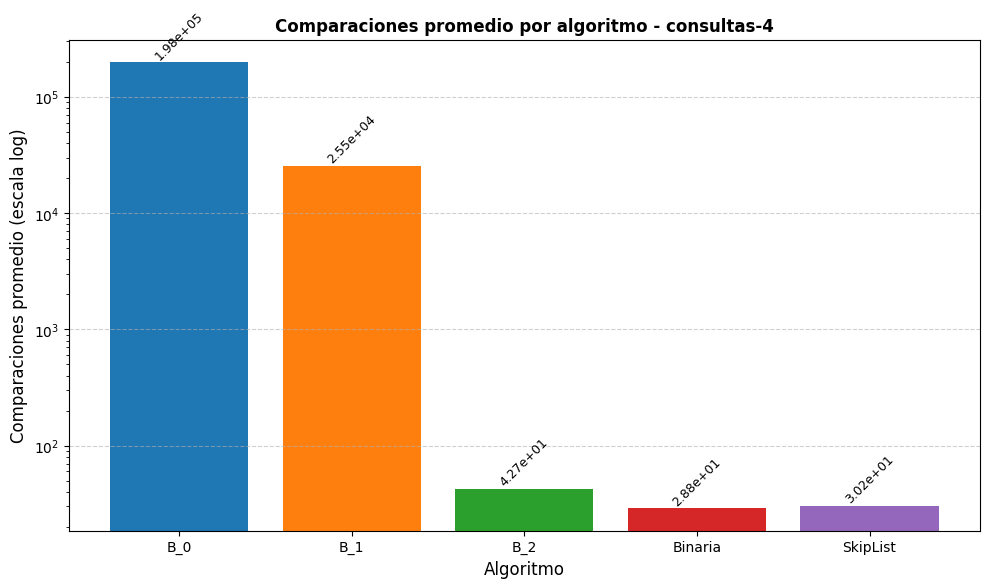

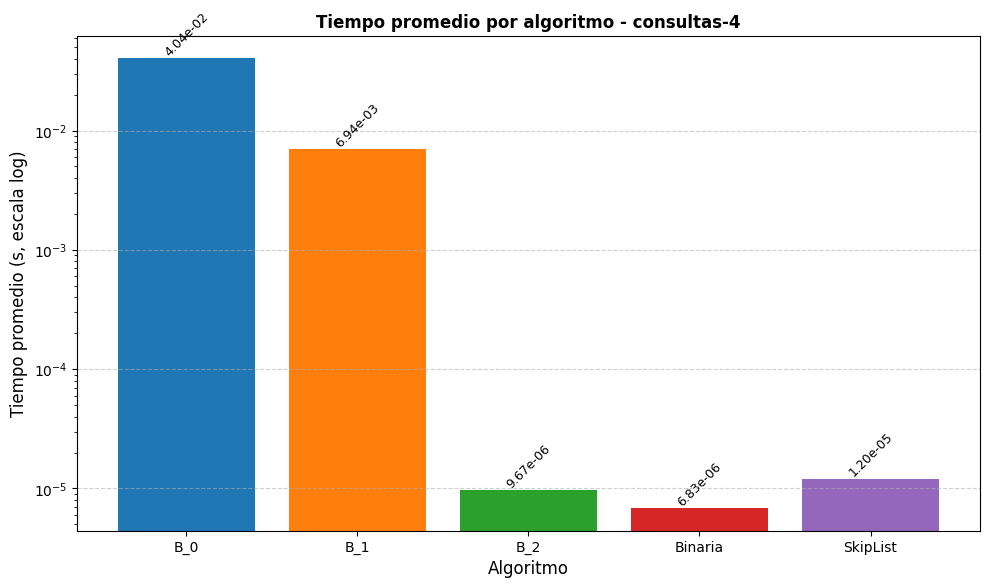

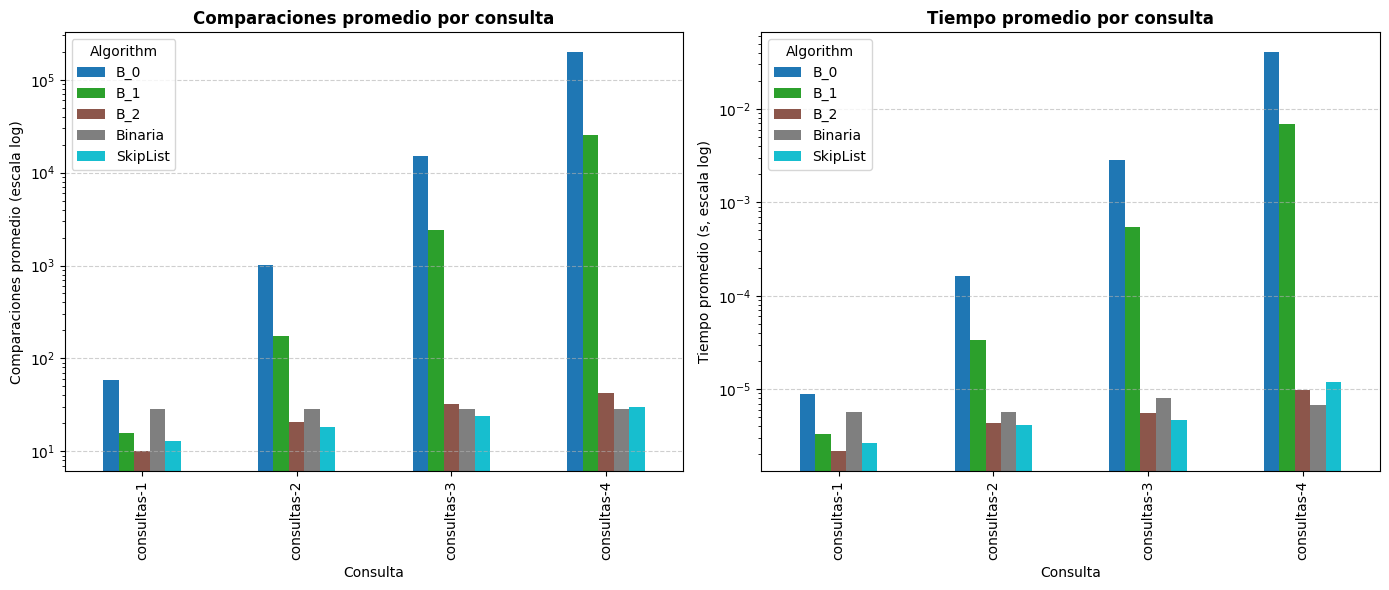

In [41]:
def graficar_resultados(resumen_global):
    consultas_unicas = resumen_global["Query"].unique()

    for consulta in consultas_unicas:
        df_c = resumen_global[resumen_global["Query"] == consulta]

        # Comparaciones promedio
        plt.figure(figsize=(10,6))
        bars = plt.bar(df_c["Algorithm"], df_c["Avg_comparisons"], color=plt.cm.tab10.colors)
        plt.title(f"Comparaciones promedio por algoritmo - {consulta}", fontweight='bold', fontsize=12)
        plt.xlabel("Algoritmo", fontsize=12)
        plt.ylabel("Comparaciones promedio (escala log)", fontsize=12)
        plt.yscale('log')
        plt.grid(axis='y', linestyle='--', alpha=0.6)

        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2e}",
                     ha='center', va='bottom', fontsize=9, rotation=45)

        plt.tight_layout()
        plt.show()

        # Tiempo promedio
        plt.figure(figsize=(10,6))
        bars = plt.bar(df_c["Algorithm"], df_c["Avg_time(s)"], color=plt.cm.tab10.colors)
        plt.title(f"Tiempo promedio por algoritmo - {consulta}", fontweight='bold', fontsize=12)
        plt.xlabel("Algoritmo", fontsize=12)
        plt.ylabel("Tiempo promedio (s, escala log)", fontsize=12)
        plt.yscale('log')
        plt.grid(axis='y', linestyle='--', alpha=0.6)

        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2e}",
                     ha='center', va='bottom', fontsize=9, rotation=45)

        plt.tight_layout()
        plt.show()

    # Resumen general comparativo
    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    resumen_pivot_comp = resumen_global.pivot(index="Query",
                          columns="Algorithm", values="Avg_comparisons")
    resumen_pivot_time = resumen_global.pivot(index="Query",
                            columns="Algorithm", values="Avg_time(s)")

    resumen_pivot_comp.plot(kind="bar", ax=axes[0], colormap="tab10", logy=True)
    axes[0].set_title("Comparaciones promedio por consulta", fontweight='bold')
    axes[0].set_xlabel("Consulta")
    axes[0].set_ylabel("Comparaciones promedio (escala log)")
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)

    resumen_pivot_time.plot(kind="bar", ax=axes[1], colormap="tab10", logy=True)
    axes[1].set_title("Tiempo promedio por consulta", fontweight='bold')
    axes[1].set_xlabel("Consulta")
    axes[1].set_ylabel("Tiempo promedio (s, escala log)")
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

graficar_resultados(resumen_global)

**Análisis de las gráficas de resultados**

Las figuras muestran la comparación del rendimiento de cinco algoritmos de búsqueda: $B_0$ (secuencial), $B_1$, $B_2$ (exponencial), Binaria y SkipList, aplicados a cuatro conjuntos distintos de consultas. El eje vertical está en escala logarítmica, lo que permite visualizar mejor las grandes diferencias entre algoritmos y conjuntos de datos.

1. Comparaciones promedio por consulta (panel izquierdo)

- $B_0$ (búsqueda secuencial) presenta el mayor número de comparaciones en todos los casos. Esto era de esperarse, ya que este algoritmo revisa los elementos uno por uno hasta encontrar el objetivo o superar el valor buscado. Su crecimiento de comparaciones es lineal con respecto al tamaño de la lista, lo que explica los grandes incrementos al pasar de consultas-1 a consultas-4.

- $B_1$ mejora significativamente el desempeño respecto a $B_0$, ya que utiliza saltos crecientes (búsqueda no acotada con crecimiento exponencial del rango). Aun así, su complejidad sigue siendo superior a la de los algoritmos logarítmicos, y por ello se observan comparaciones elevadas en consultas grandes.

- $B_2$ (búsqueda exponencial), junto con la búsqueda binaria, muestra un comportamiento mucho más eficiente: el número de comparaciones se mantiene bajo incluso en listas más extensas, lo cual concuerda con su complejidad $O(\log{n})$.

- SkipList se mantiene en niveles similares a la búsqueda binaria y $B_2$, mostrando que su estructura probabilística logra rendimientos comparables a los métodos logarítmicos deterministas. En algunos casos incluso requiere menos comparaciones, evidenciando su ventaja en operaciones de búsqueda en estructuras enlazadas.

- El aumento progresivo entre consultas-1 y consultas-4 refleja que el tamaño de las listas influye directamente en la carga de comparaciones, pero solo los algoritmos lineales ($B_0$ y $B_1$) presentan un crecimiento desproporcionado.

2. Tiempo promedio por consulta (panel derecho)

- La tendencia en los tiempos de ejecución es coherente con las comparaciones promedio: $B_0$ y $B_1$ consumen más tiempo, mientras que $B_2$, Binaria y SkipList son los más rápidos.

- En particular, $B_2$ y Binaria mantienen tiempos de ejecución muy bajos y estables, lo que confirma su eficiencia para datos ordenados. La SkipList, pese a su ligera sobrecarga en estructura, logra tiempos similares o incluso menores en algunos conjuntos.

- El crecimiento del tiempo en consultas-3 y consultas-4 muestra el impacto de listas más grandes o consultas más numerosas, pero las diferencias siguen siendo varias órdenes de magnitud a favor de los algoritmos logarítmicos.

**Discusión**

Los resultados obtenidos reflejan de manera coherente el comportamiento teórico esperado de cada algoritmo de búsqueda en función del tamaño de las listas y la complejidad de cada método. En general, se observa una tendencia creciente en el número total de comparaciones y en el tiempo de ejecución conforme aumenta el tamaño de las listas de consulta, siendo esta relación más evidente en los algoritmos de búsqueda secuencial y más controlada en los algoritmos con complejidad logarítmica.

En primer lugar, los algoritmos $B_0$, $B_1$ y $B_2$, correspondientes a distintas variantes de búsqueda secuencial, muestran un crecimiento exponencial en las comparaciones totales al pasar del archivo consultas-1 al de consultas-4. Por ejemplo, $B_0$ alcanza más de $1.18 \times 10^{10}$ comparaciones en consultas-4, lo cual se traduce en un tiempo total superior a 2200 segundos. Este comportamiento confirma su complejidad temporal $O(n)$, evidenciando que su rendimiento se degrada rápidamente conforme crece el tamaño de las listas. Las versiones optimizadas ($B_1$ y $B_2$) presentan mejoras significativas al reducir el número promedio de comparaciones en cada conjunto de pruebas, aunque mantienen la misma tendencia de crecimiento, como se espera en los algoritmos lineales.

Por otra parte, los algoritmos de búsqueda binaria y Skip List presentan una evolución mucho más estable. La búsqueda binaria mantiene un número promedio de comparaciones cercano a 28 en todas las consultas, con tiempos promedio del orden de $10^{-6}$ a $10^{-5}$ segundos, reflejando su complejidad teórica $O(\log{n})$. Su desempeño estable y predecible confirma que es un método eficiente cuando los datos se encuentran ordenados, como en este caso.

En cuanto a la Skip List, su comportamiento fue notablemente competitivo respecto a la búsqueda binaria. En particular, el número de comparaciones promedio se mantuvo dentro de un rango similar (entre 13 y 30 comparaciones en promedio) y los tiempos de ejecución fueron incluso menores en algunos escenarios. En consultas-3 y consultas-4, los valores promedio de comparaciones fueron de 25.7 y 29.8 respectivamente, lo cual demuestra que se logra mantener la eficiencia esperada incluso en grandes volúmenes de datos. Estos resultados son coherentes con la teoría propuesta por Pugh (1990), donde la Skip List combina la eficiencia promedio de una búsqueda binaria con la flexibilidad de las listas enlazadas, manteniendo un costo esperado de $O(\log{n})$ tanto en búsqueda como en inserción y eliminación.

En términos comparativos, la Skip List presenta una ligera sobrecarga de tiempo respecto a la búsqueda binaria en las listas más grandes, lo cual puede atribuirse al costo de navegación entre niveles. No obstante, la diferencia es pequeña, y los resultados evidencian que con una parametrización adecuada (por ejemplo, max_level = 12 y p = 0.25) la Skip List logra un balance eficiente entre rapidez y escalabilidad.

**Conclusión**

El análisis comparativo de los diferentes algoritmos de búsqueda muestra que la eficiencia depende estrechamente del tipo de estrategia empleada y de la estructura de datos utilizada. Los métodos de búsqueda lineal, como $B_0$ (secuencial) y $B_1$, presentan un crecimiento proporcional en el número de comparaciones y en el tiempo de ejecución conforme aumenta el tamaño de la lista, lo que limita su desempeño en escenarios de gran volumen de datos. En contraste, los algoritmos $B_2$ (exponencial), Binaria y SkipList mantienen un comportamiento estable y eficiente, reflejando una complejidad promedio de orden $O(\log{n})$.

Entre estos últimos, la SkipList destaca por su balance entre simplicidad y rendimiento, ofreciendo tiempos y comparaciones similares o incluso inferiores a los de la búsqueda binaria, gracias a su estructura probabilística que permite accesos rápidos sin requerir un arreglo contiguo. En conjunto, los resultados confirman que las estrategias basadas en búsqueda logarítmica resultan significativamente más adecuadas para el manejo eficiente de grandes volúmenes de información, reafirmando la importancia de la selección del algoritmo de búsqueda en función del contexto de aplicación y de la naturaleza de los datos.


**Referencias**

- Bentley, J. L., & Yao, A. C. (1976). An almost optimal algorithm for unbounded searching. Information Processing Letters, 5(3), 82–87.

- Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2022). Introduction to Algorithms (4th ed.). MIT Press.

- Knuth, D. E. (1998). The Art of Computer Programming, Volume 3: Sorting and Searching (2nd ed.). Addison-Wesley.

- Pugh, W. (1990). Skip lists: A probabilistic alternative to balanced trees. Communications of the ACM, 33(6), 668–676.